# NPCI MLOps Playground Challenge - 4 

[Total: 20 Marks]

## Problem Statement 

Develop a machine learning model that predicts the likelihood of a borrower defaulting on a loan based on factors such as credit history, repayment capacity, and annual income. This model aims to assist financial institutions in assessing the potential financial impact of credit risk and making informed lending decisions.

## Credit Risk Prediction

Credit Risk refers to the likelihood of a borrower failing to repay a loan, leading to potential financial losses for the lender. When financial institutions extend services like mortgages, credit cards, or personal loans, there exists an inherent risk that the borrower may default on their repayment obligations. To evaluate this risk, factors like credit history, repayment capacity, loan terms, and annual income can be considered.

Many companies, especially financial institutions, evaluate the credit risk of their existing and forthcoming customers. With the advent of technologies like machine learning, organizations can analyze customer data to establish a risk profile. Credit risk modeling evaluates a borrower's credit risk based primarily on two factors. The first factor is determining the probability of a borrower defaulting on a loan, while the second factor involves evaluating the financial impact on the lender in case of such a default.



## Dataset Description

The dataset you'll be working with is the Credit Risk dataset, which includes the following features:

* **person_age** - Age
* **person_income** - Annual Income
* **person_home_ownership** - Home ownership
* **person_emp_length** - Employment length (in years)
* **loan_intent** - Loan intent
* **loan_grade** - Loan grade
* **loan_amnt** - Loan amount
* **loan_int_rate** - Interest rate
* **loan_status** - Loan status (0 is non default 1 is default)
* **loan_percent_income** - Percent income
* **cb_person_default_on_file** - Historical default
* **cb_preson_cred_hist_length** - Credit history length


### Importing required packages  [1 Mark]


In [36]:
# ToDo
import pandas as pd
import numpy as np



### Loading the data  [1 Mark]

In [37]:
# First upload the provided `credit_risk_dataset.csv` then load it as pandas dataframe
# ToDo

df = pd.read_csv('/workspaces/npci-mlops-playground-challenge-4-mrdhanush789/credit_risk_dataset.csv')  

print(df.head())

print(df.info())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


### EDA [2 Marks] 

Explore the data, understand the features and handle the missing values.

In [38]:
# Get the shape of the dataframe
# ToDo
print(df.describe())

print(df.isnull().sum())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [39]:
# Display few rows of the dataframe
# ToDo
print(df.head())

print(df.head(5))

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [40]:
# Generate descriptive statistics for the DataFrame, to get summary statistics for numerical columns.
# ToDo
print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [41]:
# Generate information about the DataFrame, including index details, column data types, and non-null values.
# ToDo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### Data Preprocessing

#### Handling Missing values  [1 Mark]

In [42]:
# Display the total number of null values of each column
# ToDo
print(df.isnull().sum())

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


Columns **person_emp_length** and **loan_int_rate** have null values.
Handle them by replacing the missing values with the mean of the respective columns.


In [43]:
# Handle missing values - replace the missing values with the mean value of that numerical feature
# ToDo
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


/tmp/ipykernel_12919/1637824553.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


#### Handling categorical columns [3 Marks]

In [44]:
# Check for categorical columns
# ToDo
categorical_cols = df.select_dtypes(include=['object']).columns

print(categorical_cols)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [45]:
# Get the distinct categories present in each categorical column
# ToDo
for col in categorical_cols:
    print(f"Distinct categories in '{col}':")
    print(df[col].unique())
    print()

Distinct categories in 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Distinct categories in 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Distinct categories in 'loan_grade':
['D' 'B' 'C' 'A' 'E' 'F' 'G']

Distinct categories in 'cb_person_default_on_file':
['Y' 'N']



In [46]:
# Create dictionaries to map categorical values to numbers. OR Use LabelEncoder
# ToDo
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("\nUpdated DataFrame with LabelEncoder applied:")
print(df.head())


Updated DataFrame with LabelEncoder applied:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      3              123.0   
1          21           9600                      2                5.0   
2          25           9600                      0                1.0   
3          23          65500                      3                4.0   
4          24          54400                      3                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4           3      35000          16.02            1   
1            1           1       1000          11.14            0   
2            3           2       5500          12.87            1   
3            3           2      35000          15.23            1   
4            3           2      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0             

In [47]:
# Map categorical values to numbers using respective dictionaries
# ToDo
categorical_mappings = {}

for col in categorical_cols:
    categories = df[col].unique()
    mapping = {category: idx for idx, category in enumerate(categories)}
    categorical_mappings[col] = mapping
    df[col] = df[col].map(mapping)

print("Categorical Mappings:")
for col, mapping in categorical_mappings.items():
    print(f"{col}: {mapping}")
    
print("\nUpdated DataFrame with categorical columns mapped to numbers:")
print(df.head())

Categorical Mappings:
person_home_ownership: {np.int64(3): 0, np.int64(2): 1, np.int64(0): 2, np.int64(1): 3}
loan_intent: {np.int64(4): 0, np.int64(1): 1, np.int64(3): 2, np.int64(5): 3, np.int64(2): 4, np.int64(0): 5}
loan_grade: {np.int64(3): 0, np.int64(1): 1, np.int64(2): 2, np.int64(0): 3, np.int64(4): 4, np.int64(5): 5, np.int64(6): 6}
cb_person_default_on_file: {np.int64(1): 0, np.int64(0): 1}

Updated DataFrame with categorical columns mapped to numbers:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      1                5.0   
2          25           9600                      2                1.0   
3          23          65500                      0                4.0   
4          24          54400                      0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0    

In [48]:
# Display the data to observe the changes
# ToDo
print("Updated DataFrame with categorical columns mapped to numbers:")
print(df.head())

Updated DataFrame with categorical columns mapped to numbers:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      1                5.0   
2          25           9600                      2                1.0   
3          23          65500                      0                4.0   
4          24          54400                      0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            0           0      35000          16.02            1   
1            1           1       1000          11.14            0   
2            2           2       5500          12.87            1   
3            2           2      35000          15.23            1   
4            2           2      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length 

#### Get/Visualize the count of each classes(defaulter or Not) to understand class distribution [1 Mark]

Class distribution (default vs. non-default):
loan_status
0    25473
1     7108
Name: count, dtype: int64


/tmp/ipykernel_12919/3256211327.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


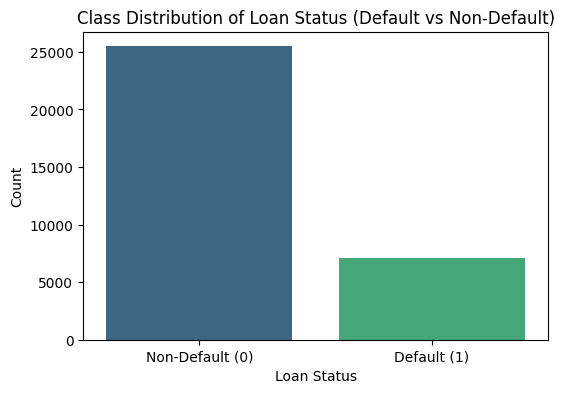

In [49]:
# Calculate the class distribution
# ToDo
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = df['loan_status'].value_counts()

print("Class distribution (default vs. non-default):")
print(class_counts)

# Create a bar plot
# ToDo
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution of Loan Status (Default vs Non-Default)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'])
plt.show()

### Define target variable and features [1 Mark]

In [50]:
# Define features(X) and target variable(y)
# ToDo
y = df['loan_status']  # Target variable: loan_status (1 = Default, 0 = Non-Default)
X = df.drop(columns=['loan_status'])  # Features: All columns except loan_status

print("Features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())

Features (X):
   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      0              123.0   
1          21           9600                      1                5.0   
2          25           9600                      2                1.0   
3          23          65500                      0                4.0   
4          24          54400                      0                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            0           0      35000          16.02                 0.59   
1            1           1       1000          11.14                 0.10   
2            2           2       5500          12.87                 0.57   
3            2           2      35000          15.23                 0.53   
4            2           2      35000          14.27                 0.55   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                  

### Train-Test split [1 Mark]

In [51]:
# Split the data into training and testing sets
# Use `stratify` parameter to maintain the class distribution across the training and testing set
# ToDo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features
    y,  # Target variable
    test_size=0.2,  
    random_state=42,  
    stratify=y  
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

print("\nClass distribution in the training set:")
print(y_train.value_counts())

print("\nClass distribution in the testing set:")
print(y_test.value_counts())

Training set size: 26064 samples
Testing set size: 6517 samples

Class distribution in the training set:
loan_status
0    20378
1     5686
Name: count, dtype: int64

Class distribution in the testing set:
loan_status
0    5095
1    1422
Name: count, dtype: int64


### Check the class distribution in the training and test sets [1 Mark]

Ensure that both sets have same target class distribution as of the original dataset

In [52]:
# Calculate the class distribution in the training set
# ToDo
original_class_dist = y.value_counts()

train_class_dist = y_train.value_counts()

test_class_dist = y_test.value_counts()

print("Class distribution in the original dataset:")
print(original_class_dist)

print("\nClass distribution in the training set:")
print(train_class_dist)

print("\nClass distribution in the testing set:")
print(test_class_dist)

original_class_percent = original_class_dist / original_class_dist.sum() * 100
train_class_percent = train_class_dist / train_class_dist.sum() * 100
test_class_percent = test_class_dist / test_class_dist.sum() * 100

print("\nClass percentage in the original dataset:")
print(original_class_percent)

print("\nClass percentage in the training set:")
print(train_class_percent)

print("\nClass percentage in the testing set:")
print(test_class_percent)

Class distribution in the original dataset:
loan_status
0    25473
1     7108
Name: count, dtype: int64

Class distribution in the training set:
loan_status
0    20378
1     5686
Name: count, dtype: int64

Class distribution in the testing set:
loan_status
0    5095
1    1422
Name: count, dtype: int64

Class percentage in the original dataset:
loan_status
0    78.183604
1    21.816396
Name: count, dtype: float64

Class percentage in the training set:
loan_status
0    78.184469
1    21.815531
Name: count, dtype: float64

Class percentage in the testing set:
loan_status
0    78.180144
1    21.819856
Name: count, dtype: float64


In [53]:
# Calculate the class distribution in the testing set
# ToDo
test_class_dist = y_test.value_counts()

print("Class distribution in the testing set:")
print(test_class_dist)

test_class_percent = test_class_dist / test_class_dist.sum() * 100

print("\nClass percentage in the testing set:")
print(test_class_percent)

Class distribution in the testing set:
loan_status
0    5095
1    1422
Name: count, dtype: int64

Class percentage in the testing set:
loan_status
0    78.180144
1    21.819856
Name: count, dtype: float64


### Feature Scaling [1 Mark]

In [54]:
# Initialize StandardScaler and transform the training and testing features
# ToDo
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("Scaled Training Features:")
print(X_train_scaled[:5])  # Display first 5 rows

print("\nScaled Testing Features:")
print(X_test_scaled[:5])

Scaled Training Features:
[[-4.27163107e-01  2.75966614e+00  1.13463301e+00 -1.93163191e-01
  -8.00036745e-01  9.87128287e-01  1.02145474e+00 -1.28907697e+00
  -9.37956133e-01  4.63610800e-01 -4.42816731e-01]
 [-1.05935771e+00 -7.54040170e-01 -9.48197908e-01  4.99747256e-02
  -1.39664794e+00 -7.74133465e-01 -1.28166412e+00  3.78651467e-01
  -8.44327918e-01  4.63610800e-01 -4.42816731e-01]
 [-4.27163107e-01 -2.04717017e-01  1.13463301e+00  1.26566431e+00
  -2.03425554e-01 -7.74133465e-01  1.02145474e+00  4.92434109e-01
   1.21549281e+00  4.63610800e-01 -9.38514340e-01]
 [ 4.69828482e-02 -7.72874106e-01  9.32175517e-02 -1.16051011e-03
  -2.03425554e-01  1.06497411e-01 -7.25738880e-01  9.63819339e-01
   1.21549281e+00  4.63610800e-01  5.48578487e-01]
 [-4.27163107e-01 -2.51801858e-01  1.13463301e+00 -6.79439025e-01
   3.93185636e-01  9.87128287e-01  6.84400381e-02 -1.01274769e+00
   2.79210659e-01  4.63610800e-01 -9.38514340e-01]]

Scaled Testing Features:
[[-0.90130906 -0.25180186 -0.948

### Model Training [3 Mars]


In [55]:
# Initialize the LogisticRegression model
# ToDo
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

# Fit the model with the SCALED training data
# ToDo
model.fit(X_train_scaled, y_train)

print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

train_accuracy = model.score(X_train_scaled, y_train)
print("\nTraining Accuracy:", train_accuracy)

Model Coefficients: [[ 0.03287894  0.01825219 -0.40919138 -0.04069848  0.21691676 -0.07658817
  -0.44938185  0.85835996  1.18034534 -0.07808008 -0.03017392]]
Model Intercept: [-1.80123407]

Training Accuracy: 0.8388198281154082


In [56]:
# Initialize the DecisionTreeClassifier model
# ToDo
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo
tree_model.fit(X_train, y_train)

train_accuracy_tree = tree_model.score(X_train, y_train)
print("Training Accuracy for Decision Tree:", train_accuracy_tree)

Training Accuracy for Decision Tree: 1.0


In [57]:
# Initialize the RandomForestClassifier model
# ToDo
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Fit the model with the unscaled training data (Feature Scaling is not necessary for Tree based models)
# ToDo
rf_model.fit(X_train, y_train)

train_accuracy_rf = rf_model.score(X_train, y_train)
print("Training Accuracy for Random Forest:", train_accuracy_rf)


Training Accuracy for Random Forest: 0.9999232658072437


### Model Evaluation [2 Marks]


In [58]:
# Make predictions on the test set with each of the models above
# ToDo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions using Logistic Regression
logreg_predictions = model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy on Test Set:", logreg_accuracy)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

# Predictions using Decision Tree Classifier
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
print("\nDecision Tree Accuracy on Test Set:", tree_accuracy)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))

# Predictions using Random Forest Classifier
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy on Test Set:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Logistic Regression Accuracy on Test Set: 0.843486266687126

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5095
           1       0.74      0.44      0.55      1422

    accuracy                           0.84      6517
   macro avg       0.80      0.70      0.73      6517
weighted avg       0.83      0.84      0.83      6517


Decision Tree Accuracy on Test Set: 0.8830750345250882

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5095
           1       0.72      0.77      0.74      1422

    accuracy                           0.88      6517
   macro avg       0.83      0.84      0.83      6517
weighted avg       0.89      0.88      0.88      6517


Random Forest Accuracy on Test Set: 0.9294153751726254

Random Forest Classification Report:
              precision    recall  f1-score   support


In [59]:
# Evaluate each of the model performance

# Show accuracy, f1 score, precision, & recall for each of the trained models
# ToDo
from sklearn.metrics import classification_report, accuracy_score

# Evaluate Logistic Regression model
logreg_predictions = model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_class_report = classification_report(y_test, logreg_predictions)

# Evaluate Decision Tree model
tree_predictions = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_class_report = classification_report(y_test, tree_predictions)

# Evaluate Random Forest model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# Displaying the performance of each model
print("Logistic Regression Model Performance:")
print(f"Accuracy: {logreg_accuracy:.4f}")
print("Classification Report:")
print(logreg_class_report)

print("\nDecision Tree Model Performance:")
print(f"Accuracy: {tree_accuracy:.4f}")
print("Classification Report:")
print(tree_class_report)

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(rf_class_report)

Logistic Regression Model Performance:
Accuracy: 0.8435
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5095
           1       0.74      0.44      0.55      1422

    accuracy                           0.84      6517
   macro avg       0.80      0.70      0.73      6517
weighted avg       0.83      0.84      0.83      6517


Decision Tree Model Performance:
Accuracy: 0.8831
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      5095
           1       0.72      0.77      0.74      1422

    accuracy                           0.88      6517
   macro avg       0.83      0.84      0.83      6517
weighted avg       0.89      0.88      0.88      6517


Random Forest Model Performance:
Accuracy: 0.9294
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
          

### Inference [2 Marks]

In [60]:
# Create a sample input dictionary with keys as feature names and values as feature values
# ToDo
import pandas as pd

sample_input = {
    'person_age': [35],
    'person_income': [60000],
    'person_home_ownership': [1],  # Assuming 1 = 'own', 0 = 'rent', etc.
    'person_emp_length': [5],  # 5 years of employment
    'loan_intent': [1],  # Example intent: 1 = 'personal', 2 = 'educational', etc.
    'loan_grade': [3],  # Example grade: 3 = 'C'
    'loan_amnt': [15000],  # Loan amount requested
    'loan_int_rate': [0.08],  # 8% interest rate
    'loan_percent_income': [0.25],  # 25% of income as loan
    'cb_person_default_on_file': [0],  # 0 = no default history
    'cb_person_cred_hist_length': [10]  # Corrected feature name (with "person" and "cred")
}



# Convert the sample input dictionary into a dataframe to feed to the model
# ToDo
sample_df = pd.DataFrame(sample_input)

print("Sample Input DataFrame:")
print(sample_df)

# Logistic Regression Prediction
logreg_prediction = model.predict(sample_df)
print("\nLogistic Regression Prediction:", logreg_prediction)

# Decision Tree Prediction
tree_prediction = tree_model.predict(sample_df)
print("Decision Tree Prediction:", tree_prediction)

# Random Forest Prediction
rf_prediction = rf_model.predict(sample_df)
print("Random Forest Prediction:", rf_prediction)



Sample Input DataFrame:
   person_age  person_income  person_home_ownership  person_emp_length  \
0          35          60000                      1                  5   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0            1           3      15000           0.08                 0.25   

   cb_person_default_on_file  cb_person_cred_hist_length  
0                          0                          10  

Logistic Regression Prediction: [0]
Decision Tree Prediction: [0]
Random Forest Prediction: [0]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [61]:
# Define a simple fuction to make prediction for the sample input (use the best model among the above trained models)
# ToDo
import pandas as pd

def make_prediction(sample_input):
    
    sample_df = pd.DataFrame(sample_input)
    
    rf_prediction = rf_model.predict(sample_df)
    
    return rf_prediction[0]  

# Example sample input
sample_input = {
    'person_age': [35],
    'person_income': [60000],
    'person_home_ownership': [1],  # Assuming 1 = 'own', 0 = 'rent', etc.
    'person_emp_length': [5],  # 5 years of employment
    'loan_intent': [1],  # Example intent: 1 = 'personal', 2 = 'educational', etc.
    'loan_grade': [3],  # Example grade: 3 = 'C'
    'loan_amnt': [15000],  # Loan amount requested
    'loan_int_rate': [0.08],  # 8% interest rate
    'loan_percent_income': [0.25],  # 25% of income as loan
    'cb_person_default_on_file': [0],  # 0 = no default history
    'cb_person_cred_hist_length': [10]  # Corrected feature name
}

# Call the function and display the prediction
prediction = make_prediction(sample_input)

# Output the prediction result
if prediction == 0:
    print("The borrower is predicted to NOT default on the loan.")
else:
    print("The borrower is predicted to DEFAULT on the loan.")


The borrower is predicted to NOT default on the loan.


In [62]:
# Make prediction using the defined function using the sample input
# ToDo
import pandas as pd

def make_prediction(sample_input):
    
    sample_df = pd.DataFrame(sample_input)
    
    rf_prediction = rf_model.predict(sample_df)
    
    return rf_prediction[0]  

# Example sample input (to be predicted)
sample_input = {
    'person_age': [35],
    'person_income': [60000],
    'person_home_ownership': [1],  # Assuming 1 = 'own', 0 = 'rent', etc.
    'person_emp_length': [5],  # 5 years of employment
    'loan_intent': [1],  # Example intent: 1 = 'personal', 2 = 'educational', etc.
    'loan_grade': [3],  # Example grade: 3 = 'C'
    'loan_amnt': [15000],  # Loan amount requested
    'loan_int_rate': [0.08],  # 8% interest rate
    'loan_percent_income': [0.25],  # 25% of income as loan
    'cb_person_default_on_file': [0],  # 0 = no default history
    'cb_person_cred_hist_length': [10]  # Corrected feature name
}

# Call the function and display the prediction
prediction = make_prediction(sample_input)

# Output the prediction result
if prediction == 0:
    print("The borrower is predicted to NOT default on the loan.")
else:
    print("The borrower is predicted to DEFAULT on the loan.")

The borrower is predicted to NOT default on the loan.
